# Metin Görselleştirme

In [1]:
import nltk
import pandas as pd
from textblob import Word
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("train.tsv", sep = "\t")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


## Ön İşlemler

### 1. Büyük/Küçük Harf Dönüşümü

In [4]:
df["Phrase"] = df["Phrase"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2


### 2. Noktalama İşaretlerinin Kaldırılması

In [5]:
df["Phrase"] = df["Phrase"].str.replace("[^\w\s]", "")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2


### 3. Sayıların Kaldırılması

In [6]:
df["Phrase"] = df["Phrase"].str.replace("\d", "")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2


### 4. Stopwords Kaldırılması

In [7]:
nltk.download("stopwords", quiet=True)

True

In [8]:
sw = stopwords.words("english")
df["Phrase"] = df["Phrase"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


### 5. Seyrek İfadelerin Silinmesi

In [9]:
sil = pd.Series(" ".join(df["Phrase"]).split()).value_counts()[-16000:]
df["Phrase"] = df["Phrase"].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,good good much story,1
1,2,1,good,2
2,3,1,,2
3,4,1,,2
4,5,1,,2


### 6. Lemmatize

In [10]:
nltk.download("wordnet", quiet=True)

True

In [11]:
df["Phrase"] = df["Phrase"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,good good much story,1
1,2,1,good,2
2,3,1,,2
3,4,1,,2
4,5,1,,2


In [12]:
tf1 = (df["Phrase"]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ["Words","TF"]
tf1.head()

,Words,TF
0,good,2043.0
1,story,2520.0
2,much,1862.0
3,,92999.0
4,even,1597.0


In [13]:
tf1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Words   75 non-null     object 
 1   TF      75 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [14]:
tf1.nunique()

Words    75
TF       72
dtype: int64

### 7. 3000'den fazla geçen kelimeleri görselleştirelim.

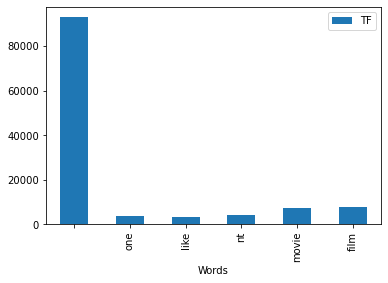

In [15]:
x = tf1[tf1["TF"] > 3000]
x.plot.bar(x = "Words", y = "TF");